# Internship number - DS2312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

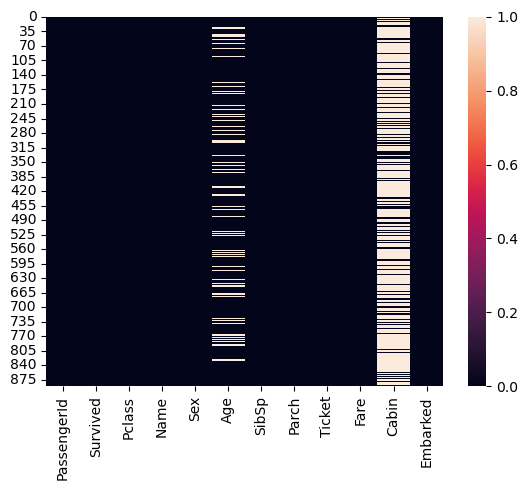

In [6]:
sns.heatmap(df.isna())

In [7]:
df.drop(['Cabin','Name','Ticket','PassengerId'], axis=1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
mean = df.groupby('Pclass')['Age'].transform('mean')

In [10]:
df['Age'].fillna(mean,inplace=True)

In [11]:
df.duplicated().sum()

111

In [14]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [15]:
df['Survived'].value_counts()

0    458
1    320
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

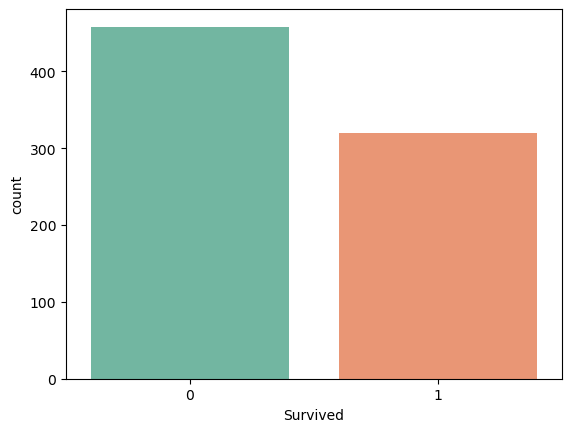

In [16]:
sns.countplot(x= 'Survived',data = df, palette='Set2')

<AxesSubplot:xlabel='Survived', ylabel='count'>

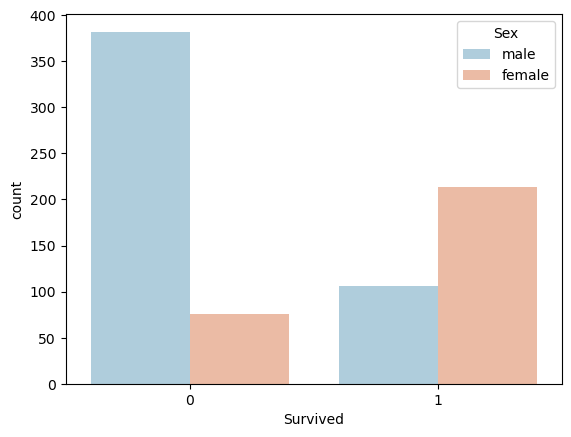

In [17]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

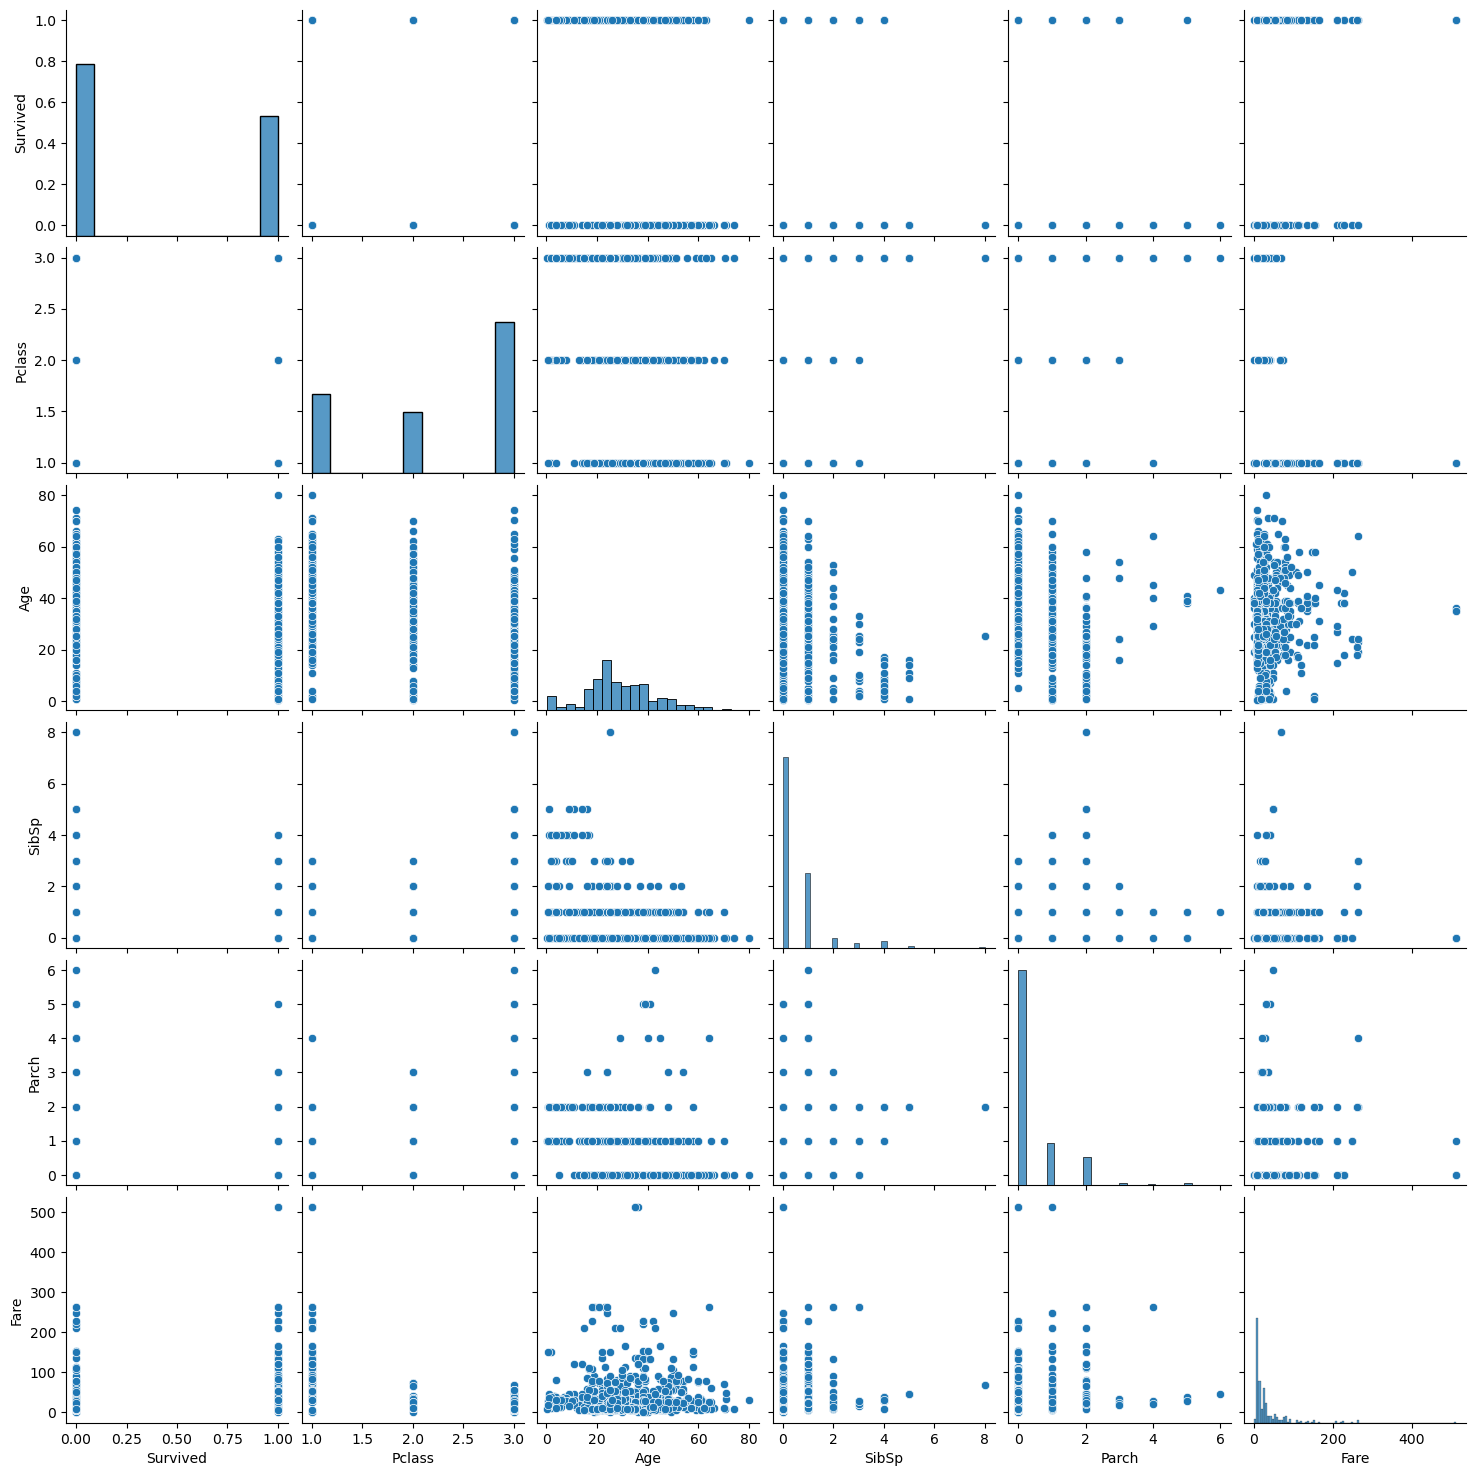

In [18]:
sns.pairplot(df)

<AxesSubplot:>

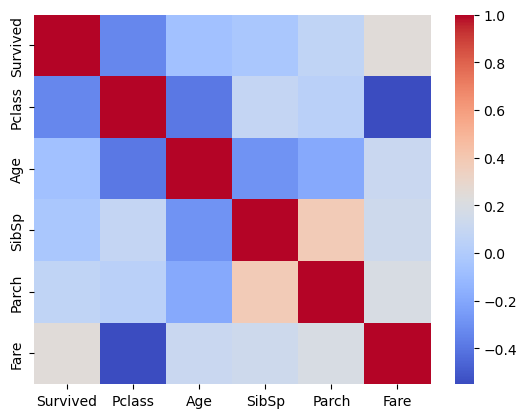

In [19]:
sns.heatmap(df.corr(),cmap='coolwarm')

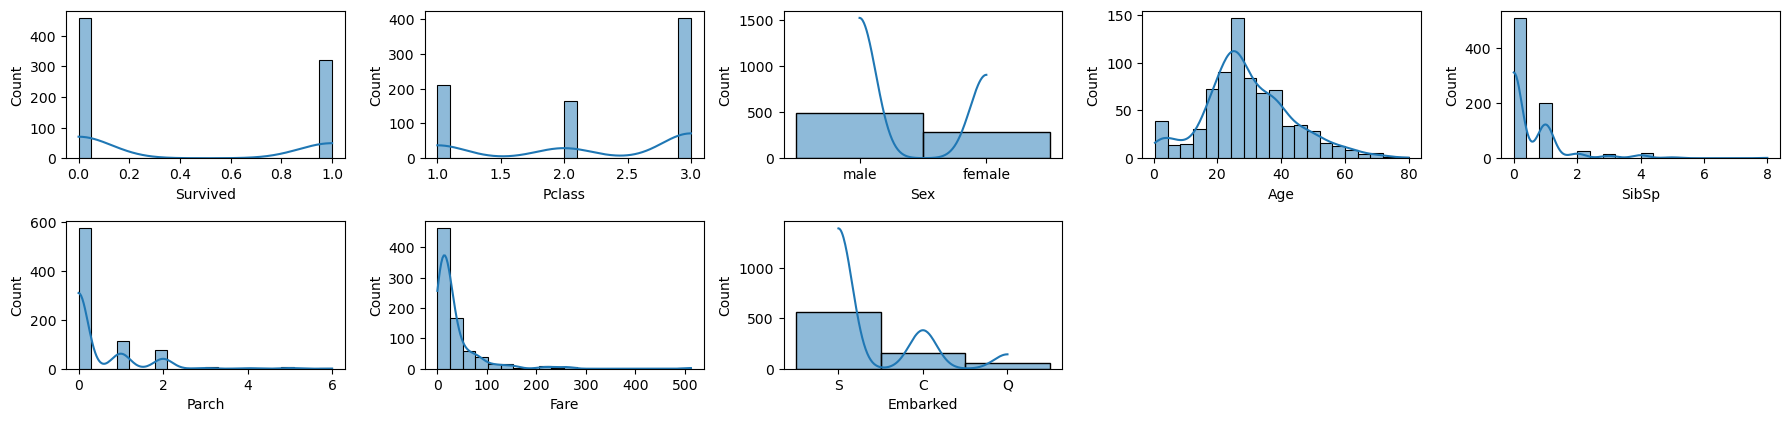

In [20]:
plt.figure(figsize=(18,6))
p = 1
for i in df.columns:
    if p<=13:
        plt.subplot(3,5,p)
        sns.histplot(df[i], kde=True, bins=20)
        plt.xlabel(i)
    p += 1
plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  778 non-null    int64
 1   Pclass    778 non-null    int64
 2   Sex       778 non-null    int32
 3   Age       778 non-null    int64
 4   SibSp     778 non-null    int64
 5   Parch     778 non-null    int64
 6   Fare      778 non-null    int64
 7   Embarked  778 non-null    int32
dtypes: int32(2), int64(6)
memory usage: 48.6 KB


In [23]:
x = df.drop('Survived',axis=1)
y = df.Survived

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [26]:
lr = LogisticRegression() 
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rc = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8326848249027238
--------------------------------------------------
[[126  12]
 [ 31  88]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.80      0.91      0.85       138
           1       0.88      0.74      0.80       119

    accuracy                           0.83       257
   macro avg       0.84      0.83      0.83       257
weighted avg       0.84      0.83      0.83       257

--------------------------------------------------
Score_train: 0.781190019193858


In [29]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.7003891050583657
--------------------------------------------------
[[100  38]
 [ 39  80]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.72      0.72      0.72       138
           1       0.68      0.67      0.68       119

    accuracy                           0.70       257
   macro avg       0.70      0.70      0.70       257
weighted avg       0.70      0.70      0.70       257

--------------------------------------------------
Score_train: 0.9884836852207294


In [30]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred_train = kn.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.6575875486381323
--------------------------------------------------
[[111  27]
 [ 61  58]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.65      0.80      0.72       138
           1       0.68      0.49      0.57       119

    accuracy                           0.66       257
   macro avg       0.66      0.65      0.64       257
weighted avg       0.66      0.66      0.65       257

--------------------------------------------------
Score_train: 0.7735124760076776


In [31]:
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
y_pred_train = rc.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.7821011673151751
--------------------------------------------------
[[114  24]
 [ 32  87]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.78      0.83      0.80       138
           1       0.78      0.73      0.76       119

    accuracy                           0.78       257
   macro avg       0.78      0.78      0.78       257
weighted avg       0.78      0.78      0.78       257

--------------------------------------------------
Score_train: 0.9884836852207294


In [32]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_pred_train = gb.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8171206225680934
--------------------------------------------------
[[130   8]
 [ 39  80]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.77      0.94      0.85       138
           1       0.91      0.67      0.77       119

    accuracy                           0.82       257
   macro avg       0.84      0.81      0.81       257
weighted avg       0.83      0.82      0.81       257

--------------------------------------------------
Score_train: 0.8905950095969289


In [33]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.6186770428015564
--------------------------------------------------
[[124  14]
 [ 84  35]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.60      0.90      0.72       138
           1       0.71      0.29      0.42       119

    accuracy                           0.62       257
   macro avg       0.66      0.60      0.57       257
weighted avg       0.65      0.62      0.58       257

--------------------------------------------------
Score_train: 0.6698656429942419


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
lr_score = cross_val_score(lr,x,y,cv=10)
print(lr_score)
print('*'*50)
print('Log reg:',lr_score.mean())

[0.76923077 0.75641026 0.79487179 0.82051282 0.75641026 0.74358974
 0.75641026 0.76923077 0.79220779 0.79220779]
**************************************************
Log reg: 0.7751082251082251


In [36]:
dt_score = cross_val_score(dt,x,y,cv=10)
print(dt_score)
print('*'*50)
print('Decision Tree:',dt_score.mean())

[0.69230769 0.70512821 0.70512821 0.75641026 0.76923077 0.74358974
 0.76923077 0.78205128 0.75324675 0.75324675]
**************************************************
Decision Tree: 0.7429570429570429


In [37]:
kn_score = cross_val_score(kn,x,y,cv=10)
print(kn_score)
print('*'*50)
print('KNN:',kn_score.mean())

[0.58974359 0.58974359 0.61538462 0.64102564 0.64102564 0.66666667
 0.69230769 0.75641026 0.55844156 0.7012987 ]
**************************************************
KNN: 0.6452047952047952


In [38]:
gb_score = cross_val_score(gb,x,y,cv=10)
print(gb_score)
print('*'*50)
print('Grad Boost:',gb_score.mean())

[0.74358974 0.78205128 0.75641026 0.84615385 0.84615385 0.82051282
 0.79487179 0.75641026 0.85714286 0.83116883]
**************************************************
Grad Boost: 0.8034465534465534


In [39]:
rc_score = cross_val_score(rc,x,y,cv=10)
print(rc_score)
print('*'*50)
print('Random Forest:',rc_score.mean())

[0.69230769 0.74358974 0.75641026 0.78205128 0.83333333 0.80769231
 0.75641026 0.76923077 0.79220779 0.81818182]
**************************************************
Random Forest: 0.7751415251415251


In [40]:
svm_score = cross_val_score(svm,x,y,cv=10)
print(svm_score)
print('*'*50)
print('SVM',svm_score.mean())

[0.53846154 0.55128205 0.66666667 0.75641026 0.66666667 0.66666667
 0.67948718 0.67948718 0.71428571 0.66233766]
**************************************************
SVM 0.6581751581751581


Gradient boost gives an accoracy score of 0.80